In [409]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
"""
we can read textfiles using pandas.read_csv('filename',sep='',and so on )
or we can use pandas.read_table('filename', delimeter='', and so on)
or lastly use pandas.read_fwf('filename',and so on)
"""
eprice_data = pd.read_csv('/content/Time_series_analysis_and_forecast_DATASET.csv')
eprice_data

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [410]:
eprice_data.dtypes

FullDate      object
Tmax         float64
SysLoad      float64
GasPrice     float64
ElecPrice    float64
dtype: object

In [411]:
eprice_data.corr()

,Tmax,SysLoad,GasPrice,ElecPrice
Tmax,1.000000,-0.009796,0.030173,0.002126
SysLoad,-0.009796,1.000000,-0.214574,0.138690
GasPrice,0.030173,-0.214574,1.000000,0.157768
ElecPrice,0.002126,0.138690,0.157768,1.000000


In [412]:
eprice_data.isnull().values.any()

False

In [413]:
eprice_data.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [414]:
eprice_data[ "FullDate" ] = pd.to_datetime(eprice_data[ "FullDate" ]) #convert column to datetime
eprice_data.set_index( "FullDate" , inplace= True )

In [415]:
eprice_data

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...
2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060


In [416]:
eprice_ddata = eprice_data.resample( 'D' ).mean()

In [417]:
eprice_ddata

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,15.8,1731.890833,3.6900,114.654167
2010-09-02,15.4,1620.791250,3.6900,23.783750
2010-09-03,18.3,1736.073333,4.4500,21.040625
2010-09-04,13.7,1484.920208,3.3900,20.928125
2010-09-05,14.9,1483.808750,4.4500,20.856458
...,...,...,...,...
2021-02-24,22.4,-63.562394,5.6000,26.448750
2021-02-25,21.6,189.128273,5.4377,24.063125
2021-02-26,22.8,396.542679,5.4242,60.228958


In [418]:
print(eprice_ddata.isnull().values.any())

False


In [419]:
eprice_ddata = eprice_ddata.reset_index()
eprice_ddata

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,15.8,1731.890833,3.6900,114.654167
1,2010-09-02,15.4,1620.791250,3.6900,23.783750
2,2010-09-03,18.3,1736.073333,4.4500,21.040625
3,2010-09-04,13.7,1484.920208,3.3900,20.928125
4,2010-09-05,14.9,1483.808750,4.4500,20.856458
...,...,...,...,...,...
3829,2021-02-24,22.4,-63.562394,5.6000,26.448750
3830,2021-02-25,21.6,189.128273,5.4377,24.063125
3831,2021-02-26,22.8,396.542679,5.4242,60.228958
3832,2021-02-27,23.5,205.536673,5.4200,20.374167


In [420]:
X_train = eprice_ddata[:2757]
X_test = eprice_ddata[2757:]

In [421]:
X_train#.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,15.8,1731.890833,3.6900,114.654167
1,2010-09-02,15.4,1620.791250,3.6900,23.783750
2,2010-09-03,18.3,1736.073333,4.4500,21.040625
3,2010-09-04,13.7,1484.920208,3.3900,20.928125
4,2010-09-05,14.9,1483.808750,4.4500,20.856458
...,...,...,...,...,...
2752,2018-03-15,25.4,1130.792744,9.1928,113.222500
2753,2018-03-16,27.0,821.269333,9.0400,94.888958
2754,2018-03-17,30.2,44.972794,8.7100,71.599375
2755,2018-03-18,21.2,-170.934915,8.4995,45.333958


In [422]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [423]:
from fbprophet import Prophet
X_train[ 'FullDate' ]= pd.to_datetime(X_train[ 'FullDate' ])
X_train = X_train.rename(columns={ "FullDate" : "ds" , "ElecPrice" : "y" })
X_train.head(40) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01,15.8,1731.890833,3.6900,114.654167
1,2010-09-02,15.4,1620.791250,3.6900,23.783750
2,2010-09-03,18.3,1736.073333,4.4500,21.040625
3,2010-09-04,13.7,1484.920208,3.3900,20.928125
4,2010-09-05,14.9,1483.808750,4.4500,20.856458
5,2010-09-06,14.6,1781.161042,3.3100,27.799583
6,2010-09-07,17.1,1743.218542,3.5100,27.690417
7,2010-09-08,18.6,1567.032292,4.7699,20.432917
8,2010-09-09,19.6,1556.319167,3.4400,21.126667
9,2010-09-10,16.5,1541.233958,3.4400,6.938542


In [424]:
X_train = X_train.iloc[:,[0,4]]
X_train.head(5)

,ds,y
0,2010-09-01,114.654167
1,2010-09-02,23.783750
2,2010-09-03,21.040625
3,2010-09-04,20.928125
4,2010-09-05,20.856458


In [425]:
model = Prophet()
model.fit(X_train)
#predict for the next 30 days
future = model.make_future_dataframe(periods= 30 , freq= 'D' )
forecast = model.predict(future)
#here after we have fitted our train_data in the model this model predicts it's own train data and we can also make it do further prediction
#by using make_future_dataframe method the value and the frquency either daily,seconds,minutes,months,yearly and so on
#then we forecast all i.e the xtrain and the future data

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [426]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,35.154875,-52.484101,135.351669,35.154875,35.154875,5.994084,5.994084,5.994084,6.640747,6.640747,6.640747,-0.646663,-0.646663,-0.646663,0.0,0.0,0.0,41.148959
1,2010-09-02,35.153537,-58.680986,148.830818,35.153537,35.153537,9.342713,9.342713,9.342713,10.713780,10.713780,10.713780,-1.371067,-1.371067,-1.371067,0.0,0.0,0.0,44.496250
2,2010-09-03,35.152199,-66.694677,138.209585,35.152199,35.152199,-0.031254,-0.031254,-0.031254,2.094989,2.094989,2.094989,-2.126242,-2.126242,-2.126242,0.0,0.0,0.0,35.120945
3,2010-09-04,35.150861,-82.887458,125.912078,35.150861,35.150861,-14.209036,-14.209036,-14.209036,-11.310788,-11.310788,-11.310788,-2.898248,-2.898248,-2.898248,0.0,0.0,0.0,20.941825
4,2010-09-05,35.149523,-82.121703,112.873623,35.149523,35.149523,-17.955599,-17.955599,-17.955599,-14.281269,-14.281269,-14.281269,-3.674329,-3.674329,-3.674329,0.0,0.0,0.0,17.193924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2782,2018-04-14,112.826582,-8.002233,192.866331,112.819098,112.836604,-15.857440,-15.857440,-15.857440,-11.310788,-11.310788,-11.310788,-4.546653,-4.546653,-4.546653,0.0,0.0,0.0,96.969142
2783,2018-04-15,112.860050,-7.945017,195.792776,112.846743,112.877490,-18.034125,-18.034125,-18.034125,-14.281269,-14.281269,-14.281269,-3.752855,-3.752855,-3.752855,0.0,0.0,0.0,94.825926
2784,2018-04-16,112.893519,8.668040,216.605798,112.877335,112.916134,2.758450,2.758450,2.758450,5.736934,5.736934,5.736934,-2.978484,-2.978484,-2.978484,0.0,0.0,0.0,115.651968
2785,2018-04-17,112.926987,10.764831,212.389044,112.907649,112.955077,-1.838501,-1.838501,-1.838501,0.405607,0.405607,0.405607,-2.244108,-2.244108,-2.244108,0.0,0.0,0.0,111.088486


In [427]:
forecast[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]].head(40)

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2010-09-01,41.148959,-52.484101,135.351669,35.154875,35.154875,35.154875
1,2010-09-02,44.496250,-58.680986,148.830818,35.153537,35.153537,35.153537
2,2010-09-03,35.120945,-66.694677,138.209585,35.152199,35.152199,35.152199
3,2010-09-04,20.941825,-82.887458,125.912078,35.150861,35.150861,35.150861
4,2010-09-05,17.193924,-82.121703,112.873623,35.149523,35.149523,35.149523
5,2010-09-06,36.441922,-69.925115,138.221549,35.148185,35.148185,35.148185
6,2010-09-07,30.357214,-72.261709,123.776930,35.146847,35.146847,35.146847
7,2010-09-08,35.863591,-61.706137,124.358264,35.145509,35.145509,35.145509
8,2010-09-09,39.238395,-53.809170,144.702370,35.144172,35.144172,35.144172
9,2010-09-10,29.955956,-72.004590,131.123144,35.142834,35.142834,35.142834


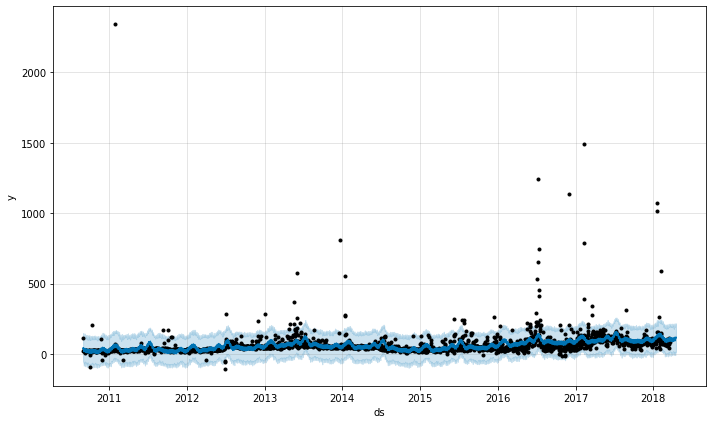

In [428]:
model.plot(forecast)
plt.show() 

In [429]:
y_true = X_train.iloc[:,[1]].values
y_true#.dtype

array([[114.65416667],
       [ 23.78375   ],
       [ 21.040625  ],
       ...,
       [ 71.599375  ],
       [ 45.33395833],
       [ 83.26270833]])

In [430]:
y_pred = forecast.iloc[:2757,[18]].values
y_pred #.dtype

array([[ 41.14895894],
       [ 44.49624979],
       [ 35.12094498],
       ...,
       [ 92.72983049],
       [ 90.22408415],
       [110.60618799]])

In [431]:
mae = mean_absolute_error(y_true,y_pred)
rmse = np.sqrt(mean_squared_error(y_true,y_pred))
mape = np.mean(np.abs((y_true - y_pred)/ y_true)) * 100

In [432]:
mae

25.907637060026044

In [433]:
rmse

77.6159071609821

In [434]:
mape

59.48390000707452

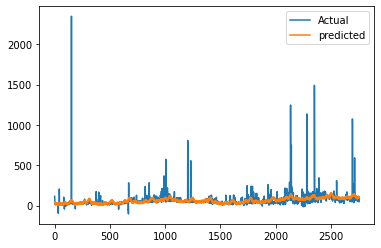

In [435]:
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.show()

# NOW WORKING WITH TEST DATA 


In [436]:
# using more regressors apart from date for the X_test
X_test.corr()

,Tmax,SysLoad,GasPrice,ElecPrice
Tmax,1.000000,0.033958,0.051595,0.013068
SysLoad,0.033958,1.000000,0.220570,0.333616
GasPrice,0.051595,0.220570,1.000000,0.298930
ElecPrice,0.013068,0.333616,0.298930,1.000000


In [437]:
X_test

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
2757,2018-03-20,22.5,320.704637,8.3995,76.375000
2758,2018-03-21,23.8,194.085777,8.4690,72.103750
2759,2018-03-22,30.1,798.407719,8.4690,94.189583
2760,2018-03-23,33.8,753.768098,8.2769,89.115000
2761,2018-03-24,34.7,156.814110,7.5090,71.737500
...,...,...,...,...,...
3829,2021-02-24,22.4,-63.562394,5.6000,26.448750
3830,2021-02-25,21.6,189.128273,5.4377,24.063125
3831,2021-02-26,22.8,396.542679,5.4242,60.228958
3832,2021-02-27,23.5,205.536673,5.4200,20.374167


In [438]:
X_test[ 'FullDate' ]= pd.to_datetime(X_test[ 'FullDate' ])
X_test = X_test.rename(columns={ "FullDate" : "ds" , "ElecPrice" : "y",'Tmax':'add1','SysLoad':'add2','GasPrice':'add3' })
X_test.head(40) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ds,add1,add2,add3,y
2757,2018-03-20,22.5,320.704637,8.3995,76.375000
2758,2018-03-21,23.8,194.085777,8.4690,72.103750
2759,2018-03-22,30.1,798.407719,8.4690,94.189583
2760,2018-03-23,33.8,753.768098,8.2769,89.115000
2761,2018-03-24,34.7,156.814110,7.5090,71.737500
2762,2018-03-25,22.1,-212.984933,7.5000,36.286458
2763,2018-03-26,20.2,737.062210,8.0580,80.982083
2764,2018-03-27,28.1,309.258029,7.7611,64.892708
2765,2018-03-28,23.3,553.090788,7.7489,79.444792
2766,2018-03-29,23.2,930.620848,7.4699,91.409167


In [439]:
X_test = X_test.iloc[:,[0,1,2,3,4]]
X_test

,ds,add1,add2,add3,y
2757,2018-03-20,22.5,320.704637,8.3995,76.375000
2758,2018-03-21,23.8,194.085777,8.4690,72.103750
2759,2018-03-22,30.1,798.407719,8.4690,94.189583
2760,2018-03-23,33.8,753.768098,8.2769,89.115000
2761,2018-03-24,34.7,156.814110,7.5090,71.737500
...,...,...,...,...,...
3829,2021-02-24,22.4,-63.562394,5.6000,26.448750
3830,2021-02-25,21.6,189.128273,5.4377,24.063125
3831,2021-02-26,22.8,396.542679,5.4242,60.228958
3832,2021-02-27,23.5,205.536673,5.4200,20.374167


In [440]:
model = Prophet()
model.fit(X_test)
#predict for the next 30 days
future = model.make_future_dataframe(periods= 30 , freq= 'D' )
forecast = model.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [441]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,99.406533,-62.613620,220.574733,99.406533,99.406533,-18.891608,-18.891608,-18.891608,-1.176927,-1.176927,-1.176927,-17.714681,-17.714681,-17.714681,0.0,0.0,0.0,80.514925
1,2018-03-21,99.457582,-60.982122,227.626794,99.457582,99.457582,-20.579955,-20.579955,-20.579955,-0.042314,-0.042314,-0.042314,-20.537641,-20.537641,-20.537641,0.0,0.0,0.0,78.877626
2,2018-03-22,99.508630,-43.925551,248.660855,99.508630,99.508630,5.385406,5.385406,5.385406,28.271275,28.271275,28.271275,-22.885869,-22.885869,-22.885869,0.0,0.0,0.0,104.894036
3,2018-03-23,99.559678,-60.361675,223.988416,99.559678,99.559678,-20.783861,-20.783861,-20.783861,3.941760,3.941760,3.941760,-24.725622,-24.725622,-24.725622,0.0,0.0,0.0,78.775817
4,2018-03-24,99.610727,-81.253326,202.094214,99.610727,99.610727,-41.486691,-41.486691,-41.486691,-15.449272,-15.449272,-15.449272,-26.037419,-26.037419,-26.037419,0.0,0.0,0.0,58.124036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,2021-03-26,3.027837,-151.624865,124.027773,2.904167,3.179066,-23.113891,-23.113891,-23.113891,3.941760,3.941760,3.941760,-27.055652,-27.055652,-27.055652,0.0,0.0,0.0,-20.086055
1103,2021-03-27,2.875260,-184.237196,105.458636,2.741264,3.040102,-42.138999,-42.138999,-42.138999,-15.449272,-15.449272,-15.449272,-26.689727,-26.689727,-26.689727,0.0,0.0,0.0,-39.263738
1104,2021-03-28,2.722683,-178.660985,115.106906,2.578798,2.901200,-43.279911,-43.279911,-43.279911,-17.410726,-17.410726,-17.410726,-25.869185,-25.869185,-25.869185,0.0,0.0,0.0,-40.557228
1105,2021-03-29,2.570107,-165.582857,123.337604,2.417680,2.762885,-22.777311,-22.777311,-22.777311,1.866204,1.866204,1.866204,-24.643515,-24.643515,-24.643515,0.0,0.0,0.0,-20.207204


In [442]:
forecast[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2018-03-20,80.514925,-62.613620,220.574733,99.406533,99.406533,99.406533
1,2018-03-21,78.877626,-60.982122,227.626794,99.457582,99.457582,99.457582
2,2018-03-22,104.894036,-43.925551,248.660855,99.508630,99.508630,99.508630
3,2018-03-23,78.775817,-60.361675,223.988416,99.559678,99.559678,99.559678
4,2018-03-24,58.124036,-81.253326,202.094214,99.610727,99.610727,99.610727
...,...,...,...,...,...,...,...
1102,2021-03-26,-20.086055,-151.624865,124.027773,3.027837,2.904167,3.179066
1103,2021-03-27,-39.263738,-184.237196,105.458636,2.875260,2.741264,3.040102
1104,2021-03-28,-40.557228,-178.660985,115.106906,2.722683,2.578798,2.901200
1105,2021-03-29,-20.207204,-165.582857,123.337604,2.570107,2.417680,2.762885


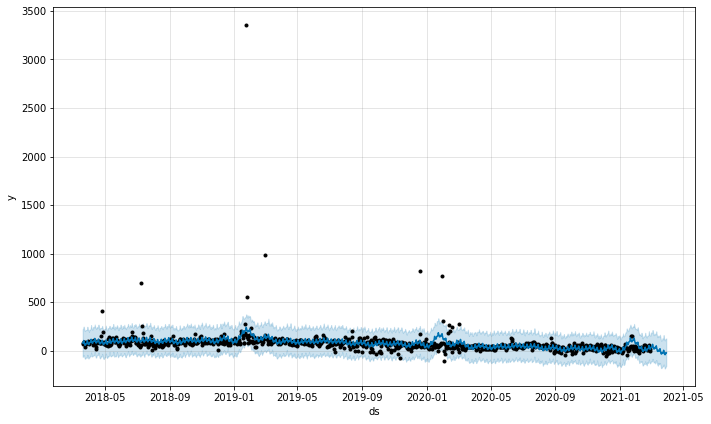

In [443]:
model.plot(forecast)
plt.show() 

In [444]:
y_true = X_test.iloc[:,[4]].values
y_true#.dtype

array([[76.375     ],
       [72.10375   ],
       [94.18958333],
       ...,
       [60.22895833],
       [20.37416667],
       [-4.124375  ]])

In [445]:
y_pred = forecast.iloc[:1077,[18]].values
y_pred #.dtype

array([[ 80.51492504],
       [ 78.87762619],
       [104.89403564],
       ...,
       [ 32.68998785],
       [ 15.94417796],
       [ 16.26736673]])

In [446]:
mae = mean_absolute_error(y_true,y_pred)
rmse = np.sqrt(mean_squared_error(y_true,y_pred))
mape = np.mean(np.abs((y_true - y_pred)/ y_true)) * 100

In [447]:
mae

35.015715844367946

In [448]:
rmse

112.19069294911937

In [449]:
mape

171.04827926983057

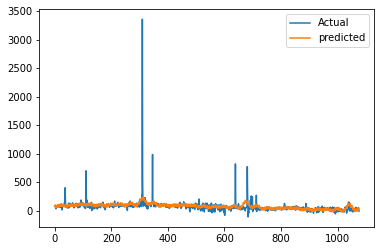

In [450]:
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.show()